In [64]:
import pandas as pd
import numpy as np

In [65]:
df=pd.read_csv('WMT.csv')
df.head()
type(df)

pandas.core.frame.DataFrame

In [66]:
df.set_index('Date',inplace=True)

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,12491.0,3.547920e+01,3.720707e+01,0.015625,1.386719e+00,1.643750e+01,5.639500e+01,1.536000e+02
High,12491.0,3.581131e+01,3.751942e+01,0.015625,1.402344e+00,1.659375e+01,5.700000e+01,1.536600e+02
Low,12491.0,3.515130e+01,3.691419e+01,0.014404,1.375000e+00,1.625000e+01,5.566500e+01,1.516600e+02
Close,12491.0,3.548538e+01,3.721441e+01,0.015625,1.386719e+00,1.637500e+01,5.631625e+01,1.527900e+02
Adj Close,12491.0,2.894868e+01,3.458537e+01,0.008889,8.583230e-01,1.058877e+01,4.092085e+01,1.508427e+02
Volume,12491.0,7.540560e+06,6.237162e+06,0.000000,3.883600e+06,6.312800e+06,9.511400e+06,1.318336e+08


In [68]:
(df.std()/df.mean())*100

Open         104.870103
High         104.769746
Low          105.015134
Close        104.872512
Adj Close    119.471336
Volume        82.714837
dtype: float64

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)


In [70]:
print(df_standardized.mean())
print(df_standardized.std())

Open        -2.184360e-16
High         1.456240e-16
Low         -7.281200e-17
Close        0.000000e+00
Adj Close    0.000000e+00
Volume       7.281200e-17
dtype: float64
Open         1.00004
High         1.00004
Low          1.00004
Close        1.00004
Adj Close    1.00004
Volume       1.00004
dtype: float64


In [71]:
import matplotlib.pyplot as plt

C:\Users\asus\AppData\Local\Temp\ipykernel_33536\2327414212.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index,rotation=45)


[Text(0, 0, '1972-08-25'),
 Text(1, 0, '1972-08-28'),
 Text(2, 0, '1972-08-29'),
 Text(3, 0, '1972-08-30'),
 Text(4, 0, '1972-08-31'),
 Text(5, 0, '1972-09-01'),
 Text(6, 0, '1972-09-05'),
 Text(7, 0, '1972-09-06'),
 Text(8, 0, '1972-09-07'),
 Text(9, 0, '1972-09-08'),
 Text(10, 0, '1972-09-11'),
 Text(11, 0, '1972-09-12'),
 Text(12, 0, '1972-09-13'),
 Text(13, 0, '1972-09-14'),
 Text(14, 0, '1972-09-15'),
 Text(15, 0, '1972-09-18'),
 Text(16, 0, '1972-09-19'),
 Text(17, 0, '1972-09-20'),
 Text(18, 0, '1972-09-21'),
 Text(19, 0, '1972-09-22'),
 Text(20, 0, '1972-09-25'),
 Text(21, 0, '1972-09-26'),
 Text(22, 0, '1972-09-27'),
 Text(23, 0, '1972-09-28'),
 Text(24, 0, '1972-09-29'),
 Text(25, 0, '1972-10-02'),
 Text(26, 0, '1972-10-03'),
 Text(27, 0, '1972-10-04'),
 Text(28, 0, '1972-10-05'),
 Text(29, 0, '1972-10-06'),
 Text(30, 0, '1972-10-09'),
 Text(31, 0, '1972-10-10'),
 Text(32, 0, '1972-10-11'),
 Text(33, 0, '1972-10-12'),
 Text(34, 0, '1972-10-13'),
 Text(35, 0, '1972-10-16'),
 T

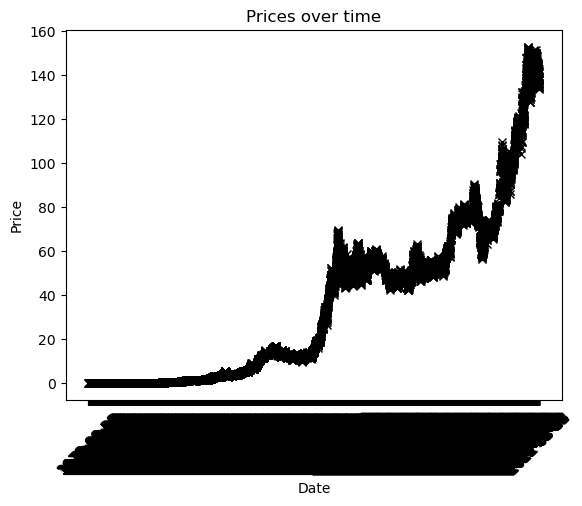

In [72]:
fig,ax=plt.subplots()
ax.plot(df.index,df["Close"],marker="x",linestyle=":",color="black")
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Prices over time')
ax.set_xticklabels(df.index,rotation=45)



In [73]:
df['MA10'] = df['Close'].rolling(window=10).mean() 
df['MA50'] = df['Close'].rolling(window=50).mean() 
df = df.dropna()
df[['Close', 'MA10', 'MA50']].head()


,Close,MA10,MA50
Date,,,
1972-11-03,0.066162,0.062866,0.061055
1972-11-06,0.066162,0.063330,0.061089
1972-11-08,0.066895,0.063843,0.061143
1972-11-09,0.066895,0.064477,0.061211
1972-11-10,0.066895,0.065064,0.061279


In [74]:
from sklearn.model_selection import train_test_split
X=df[['MA10','MA50']]
y=df['Close']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.77,shuffle=False)


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
ml=LinearRegression()
ml.fit(X_train,y_train)
y_pred=ml.predict(X_test)
error=root_mean_squared_error(y_test,y_pred)
error

1.7481430817120756

In [76]:
mean_price = df['Close'].mean()
normalized_rmse = (error / mean_price) * 100
normalized_rmse

4.907083327710754

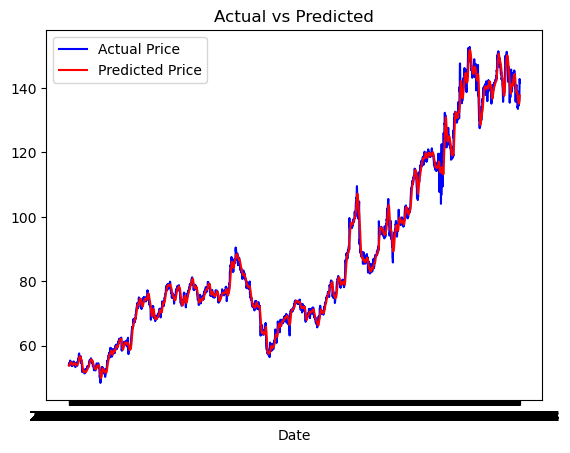

In [77]:
fig,ax=plt.subplots()
ax.plot(y_test.index, y_test, label='Actual Price', color='blue')
ax.plot(y_test.index, y_pred, label='Predicted Price', color='red')
ax.set_xlabel('Date')
ax.set_title('Actual vs Predicted')
plt.legend()